In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
# load fgsm and pgd images and labels
# import fgsm and pgd adversarial sampels
pgd_images_zico = np.load('pgd_images_zico.npz')['images']
pgd_labels_zico = np.load('pgd_images_zico.npz')['labels']

fgsm_images_zico = np.load('fgsm_images_zico.npz')['images']
fgsm_labels_zico = np.load('fgsm_images_zico.npz')['labels']

spsa_images_zico = np.load('spsa_images_zico.npz')['images']
spsa_labels_zico = np.load('spsa_images_zico.npz')['labels']

# reshape pgd and fgsm images to 28, 28, 1
pgd_images_zico = np.reshape(pgd_images_zico, (len(pgd_images_zico), 28, 28, 1))
fgsm_images_zico = np.reshape(fgsm_images_zico, (len(fgsm_images_zico), 28, 28, 1))
spsa_images_zico = np.reshape(spsa_images_zico, (len(spsa_images_zico), 28, 28, 1))

print(pgd_images_zico.shape)
print(pgd_labels_zico.shape)
print(fgsm_images_zico.shape)
print(fgsm_labels_zico.shape)   
print(spsa_images_zico.shape)
print(spsa_labels_zico.shape)

(140000, 28, 28, 1)
(140000, 1)
(140000, 28, 28, 1)
(140000, 1)
(400, 28, 28, 1)
(400, 1)


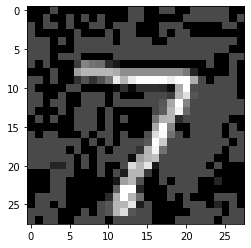

[[    0     1     2     3     4     5     6     7     8     9]
 [13720 15890 14448 14140 13748 12488 13412 14392 13636 14126]]


In [3]:
plt.imshow(fgsm_images_zico[10000], cmap='gray')
plt.show()

# show the first 1000 unique labels and counts
unique, counts = np.unique(fgsm_labels_zico, return_counts=True)
print(np.asarray((unique, counts)))

# take the first 10000 labels and images because higher epsilon values make the image unrecognizable
fgsm_images_zico = fgsm_images_zico[:10000]
fgsm_labels_zico = fgsm_labels_zico[:10000]

# squeeze fgsm_labels_zico and pgd_labels_zico to remove the extra dimension
fgsm_labels_zico = np.squeeze(fgsm_labels_zico)
pgd_labels_zico = np.squeeze(pgd_labels_zico)
spsa_labels_zico = np.squeeze(spsa_labels_zico)

In [6]:
# load models
model = tf.keras.models.load_model('assets/models/mnist_model.h5')
model_adv = tf.keras.models.load_model('assets/models/mnist_adv_model.h5')
model_adv_v2 = tf.keras.models.load_model('assets/models/mnist_adv_model_v2.h5')
model_adv_v3 = tf.keras.models.load_model('assets/models/mnist_adv_model_v3.h5')
model_adv_v3 = tf.keras.models.load_model('assets/models/mnist_adv_model_v3.h5')
model_adv_v4 = tf.keras.models.load_model('assets/models/mnist_adv_model_v4.h5')
model_adv_v5 = tf.keras.models.load_model('assets/models/mnist_adv_model_v5.h5')
model_adv_v6 = tf.keras.models.load_model('assets/models/mnist_adv_model_v6.h5')

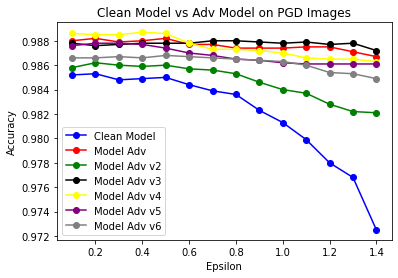

In [9]:
# divide pgd_images and pgd_labels into different epsilon values
epsilon_values = np.arange(0.1, 1.5, 0.1)

# put images into 14 groups of images as a multidiemensional array
pgd_images_grouped = np.array(np.array_split(pgd_images_zico, len(epsilon_values)))
pgd_labels_grouped = np.array(np.array_split(pgd_labels_zico, len(epsilon_values)))

plt.title('Clean Model vs Adv Model on PGD Images')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')

model_list = []
model_adv_list = []
model_adv_2_list = []
model_adv_3_list = []
model_adv_4_list = []
model_adv_5_list = []
model_adv_6_list = []

# iterate through epsilon values and evaluate model and model_adv for each iteration
for index, epsilon in enumerate(epsilon_values):
    model_list.append(model.evaluate(pgd_images_grouped[index], pgd_labels_grouped[index], verbose=0)[1])
    model_adv_list.append(model_adv.evaluate(pgd_images_grouped[index], pgd_labels_grouped[index], verbose=0)[1])
    model_adv_2_list.append(model_adv_v2.evaluate(pgd_images_grouped[index], pgd_labels_grouped[index], verbose=0)[1])
    model_adv_3_list.append(model_adv_v3.evaluate(pgd_images_grouped[index], pgd_labels_grouped[index], verbose=0)[1])
    model_adv_4_list.append(model_adv_v4.evaluate(pgd_images_grouped[index], pgd_labels_grouped[index], verbose=0)[1])
    model_adv_5_list.append(model_adv_v5.evaluate(pgd_images_grouped[index], pgd_labels_grouped[index], verbose=0)[1])
    model_adv_6_list.append(model_adv_v6.evaluate(pgd_images_grouped[index], pgd_labels_grouped[index], verbose=0)[1])

model_plot, = plt.plot(epsilon_values, model_list, color='blue', marker='o', label='Clean Model')
model_adv_plot, = plt.plot(epsilon_values, model_adv_list, color='red', marker='o', label='Model Adv')
model_adv_2_plot, = plt.plot(epsilon_values, model_adv_2_list, color='green', marker='o', label='Model Adv v2')
model_adv_3_plot, = plt.plot(epsilon_values, model_adv_3_list, color='black', marker='o', label='Model Adv v3')
model_adv_4_plot, = plt.plot(epsilon_values, model_adv_4_list, color='yellow', marker='o', label='Model Adv v4')
model_adv_5_plot, = plt.plot(epsilon_values, model_adv_5_list, color='purple', marker='o', label='Model Adv v5')
model_adv_6_plot, = plt.plot(epsilon_values, model_adv_6_list, color='gray', marker='o', label='Model Adv v6')

plt.legend(handles=[model_plot, model_adv_plot, model_adv_2_plot, model_adv_3_plot, model_adv_4_plot, model_adv_5_plot, model_adv_6_plot])
plt.show()


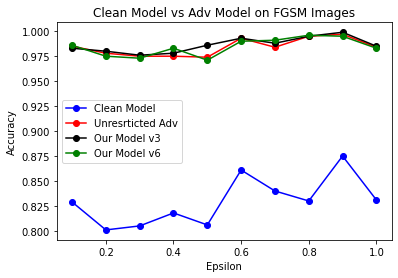

<Figure size 2400x1800 with 0 Axes>

In [19]:
# divide pgd_images and pgd_labels into different epsilon values
epsilon_values = np.arange(0.1, 1.1, 0.1)

# put images into 14 groups of images as a multidiemensional array
fgsm_images_grouped = np.array(np.array_split(fgsm_images_zico, len(epsilon_values)))
fgsm_labels_grouped = np.array(np.array_split(fgsm_labels_zico, len(epsilon_values)))

plt.title('Clean Model vs Adv Model on FGSM Images')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')

model_list = []
model_adv_list = []
model_adv_2_list = []
model_adv_3_list = []
model_adv_4_list = []
model_adv_5_list = []
model_adv_6_list = []

# iterate through epsilon values and evaluate model and model_adv for each iteration
for index, epsilon in enumerate(epsilon_values):
    model_list.append(model.evaluate(fgsm_images_grouped[index], fgsm_labels_grouped[index], verbose=0)[1])
    model_adv_list.append(model_adv.evaluate(fgsm_images_grouped[index], fgsm_labels_grouped[index], verbose=0)[1])
    # model_adv_2_list.append(model_adv_v2.evaluate(fgsm_images_grouped[index], fgsm_labels_grouped[index], verbose=0)[1])
    model_adv_3_list.append(model_adv_v3.evaluate(fgsm_images_grouped[index], fgsm_labels_grouped[index], verbose=0)[1])
    # model_adv_4_list.append(model_adv_v4.evaluate(fgsm_images_grouped[index], fgsm_labels_grouped[index], verbose=0)[1])
    # model_adv_5_list.append(model_adv_v5.evaluate(fgsm_images_grouped[index], fgsm_labels_grouped[index], verbose=0)[1])
    model_adv_6_list.append(model_adv_v6.evaluate(fgsm_images_grouped[index], fgsm_labels_grouped[index], verbose=0)[1])

model_plot, = plt.plot(epsilon_values, model_list, color='blue', marker='o', label='Clean Model')
model_adv_plot, = plt.plot(epsilon_values, model_adv_list, color='red', marker='o', label='Unresrticted Adv')
# model_adv_2_plot, = plt.plot(epsilon_values, model_adv_2_list, color='green', marker='o', label='Model Adv v2')
model_adv_3_plot, = plt.plot(epsilon_values, model_adv_3_list, color='black', marker='o', label='Our Model v3')
# model_adv_4_plot, = plt.plot(epsilon_values, model_adv_4_list, color='yellow', marker='o', label='Model Adv v4')
# model_adv_5_plot, = plt.plot(epsilon_values, model_adv_5_list, color='purple', marker='o', label='Model Adv v5')
model_adv_6_plot, = plt.plot(epsilon_values, model_adv_6_list, color='green', marker='o', label='Our Model v6')

# plt.legend(handles=[model_plot, model_adv_plot, model_adv_2_plot, model_adv_3_plot, model_adv_4_plot, model_adv_5_plot, model_adv_6_plot])
plt.legend(handles=[model_plot, model_adv_plot, model_adv_3_plot, model_adv_6_plot])
plt.figure(figsize=(8, 6), dpi=300)
plt.show()


In [20]:
model_adv.evaluate(fgsm_images_grouped[index], fgsm_labels_grouped[index], verbose=0)

[0.09448228031396866, 0.984000027179718]

In [21]:
model_adv_v3.evaluate(fgsm_images_grouped[index], fgsm_labels_grouped[index], verbose=0)

[0.06768976151943207, 0.9850000143051147]

In [22]:
model_adv_v6.evaluate(fgsm_images_grouped[index], fgsm_labels_grouped[index], verbose=0)

[0.12643341720104218, 0.9829999804496765]